In [26]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np


import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager,rc
font_ob = font_manager.FontProperties(fname='C:/Windows/Fonts/NanumBarunpenB.ttf').get_name()
rc('font',family=font_ob)

sns.set_style('dark')

In [57]:
b = pd.read_csv('C:/Users/Lee Jong Ann/Desktop/Machine Learning/CNN/전처리.csv',encoding='cp949')

In [58]:
b.head()

,사고내용,사망자수,중상자수,경상자수,부상신고자수,년,월,계절,일,시간,...,가해운전자 성별,가해운전자 연령,가해운전자 연령.1,가해운전자 연령2,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,연령대,피해운전자 상해정도
0,중상사고,0,1,0,0,2017년,1,겨울,6일,21,...,남,16세,10대,1-19,중상,승용,남,34세,3,상해없음
1,사망사고,1,0,0,0,2017년,1,겨울,17일,12,...,남,62세,60대,20-64,사망,미분류,미분류,미분류,4,미분류
2,경상사고,0,0,1,0,2017년,1,겨울,18일,18,...,남,23세,20대,20-64,상해없음,승용,남,65세,6,상해없음
3,경상사고,0,0,1,0,2017년,1,겨울,26일,21,...,남,31세,30대,20-64,경상,승용,남,28세,2,상해없음
4,사망사고,1,0,0,0,2017년,2,겨울,2일,18,...,남,55세,50대,20-64,사망,승합,남,52세,5,상해없음


In [59]:
b = b.drop(['사고유형','가해운전자 연령2','가해운전자 연령','피해운전자 연령','가해운전자 차종','일','사고내용'],axis=1)

In [60]:
b = b.rename({'가해운전자 연령.1':'가해운전자 연령대'},axis='columns')

In [68]:
b.keys()

Index(['사망자수', '중상자수', '경상자수', '부상신고자수', '년', '월', '계절', '시간', '시간대', '요일',
       '주중주말', '구', '시군', '법정동', '사고타입', '사고타입2', '법규위반', '노면상태', '기상상태',
       '도로형태', '가해운전자 성별', '가해운전자 연령대', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '연령대', '피해운전자 상해정도'],
      dtype='object')

In [157]:
extract = b[['사망자수','시간대','연령대','계절','가해운전자 상해정도','피해운전자 성별','피해운전자 상해정도','피해운전자 차종']]
extract.head()

,사망자수,시간대,연령대,계절,가해운전자 상해정도,피해운전자 성별,피해운전자 상해정도,피해운전자 차종
0,0,18-23PM,3,겨울,2,남,상해없음,승용
1,1,12-17PM,4,겨울,4,미분류,미분류,미분류
2,0,18-23PM,6,겨울,0,남,상해없음,승용
3,0,18-23PM,2,겨울,1,남,상해없음,승용
4,1,18-23PM,5,겨울,4,남,상해없음,승합


In [158]:
extract_dummy = pd.get_dummies(extract['계절'])
extract = extract.join(extract_dummy)

# c =  extract_dummy.to_csv('더미테스트.csv',encoding='cp949',index=False)

In [159]:
extract.head()

,사망자수,시간대,연령대,계절,가해운전자 상해정도,피해운전자 성별,피해운전자 상해정도,피해운전자 차종,가을,겨울,봄,여름
0,0,18-23PM,3,겨울,2,남,상해없음,승용,0,1,0,0
1,1,12-17PM,4,겨울,4,미분류,미분류,미분류,0,1,0,0
2,0,18-23PM,6,겨울,0,남,상해없음,승용,0,1,0,0
3,0,18-23PM,2,겨울,1,남,상해없음,승용,0,1,0,0
4,1,18-23PM,5,겨울,4,남,상해없음,승합,0,1,0,0


In [160]:
extract.corr(method='pearson')

,사망자수,연령대,가해운전자 상해정도,가을,겨울,봄,여름
사망자수,1.000000,0.019662,0.631849,0.009154,-0.051042,0.018500,0.009287
연령대,0.019662,1.000000,0.031184,-0.035014,0.036796,0.062736,-0.051835
가해운전자 상해정도,0.631849,0.031184,1.000000,-0.020861,-0.041987,0.029031,0.022007
가을,0.009154,-0.035014,-0.020861,1.000000,-0.236556,-0.388596,-0.433497
겨울,-0.051042,0.036796,-0.041987,-0.236556,1.000000,-0.228280,-0.254657
봄,0.018500,0.062736,0.029031,-0.388596,-0.228280,1.000000,-0.418330
여름,0.009287,-0.051835,0.022007,-0.433497,-0.254657,-0.418330,1.000000


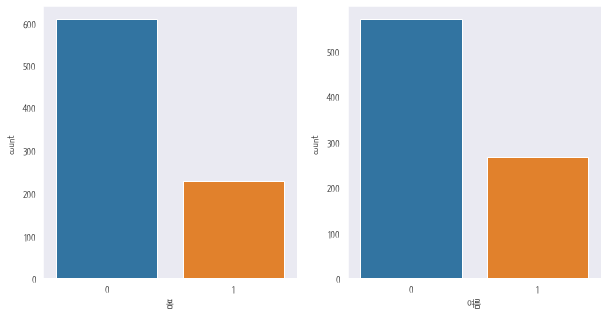

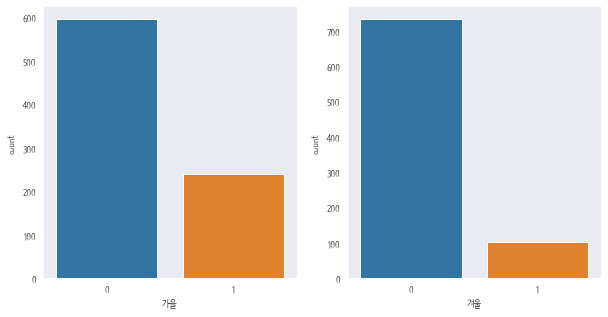

In [134]:
fig,(ax1,ax2)= plt.subplots(1,2)
fig.set_size_inches(10,5)

sns.countplot(data=extract_dummy,x=extract_dummy['봄'],ax=ax1)
sns.countplot(data=extract_dummy,x=extract_dummy['여름'],ax=ax2)

fig,(ax3,ax4)= plt.subplots(1,2)
fig.set_size_inches(10,5)

sns.countplot(data=extract_dummy,x=extract_dummy['가을'],ax=ax3)
sns.countplot(data=extract_dummy,x=extract_dummy['겨울'],ax=ax4)

In [75]:
b['가해운전자 상해정도'].value_counts()

상해없음    382
경상      160
중상      144
부상신고     69
사망       61
기타불명     20
Name: 가해운전자 상해정도, dtype: int64

In [76]:
b['가해운전자 상해정도'] = b['가해운전자 상해정도'].replace({'상해없음': 0,'경상':1,'중상':2,'부상신고':3,'사망':4,'기타불명':0})

In [184]:
print('가해운전자 상해정도')
print('상해없음 = 0' + '\n' + '경상 = 1' +'\n'+ '중상 = 2' + '\n' + '부상신고 = 3' +'\n' +'사망 = 4' + '\n')

가해운전자 상해정도
상해없음 = 0
경상 = 1
중상 = 2
부상신고 = 3
사망 = 4



Text(0.5, 1.0, '강원도 이륜차 가해운전자 상해정도')

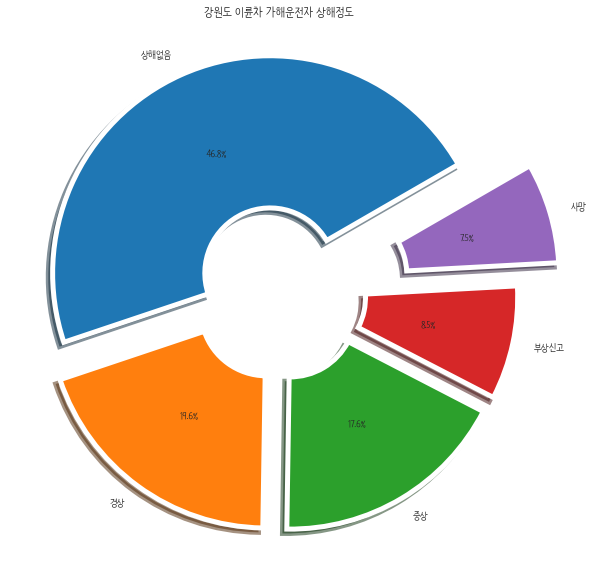

In [105]:
label = ['상해없음','경상','중상','부상신고','사망']
range = [382,160,144,69,61]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = (0.1,0.1,0.1,0.1,0.3)
plt.figure(figsize=(15,10))
plt.pie(range,
    labels=label,
    shadow=True,
    wedgeprops=wedgeprops,
    startangle=30,
    autopct='%.1f%%',
    explode = explode
    )
plt.title('강원도 이륜차 가해운전자 상해정도')


In [74]:
extract.corr(method='pearson')

,사망자수,연령대
사망자수,1.000000,0.019662
연령대,0.019662,1.000000


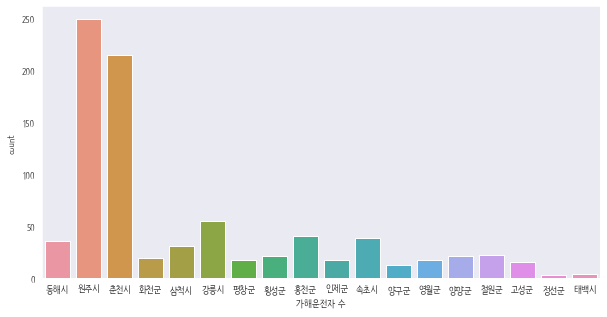

In [55]:
fig,ax = plt.subplots()
fig.set_size_inches(10,5)

sns.countplot(data=b,x='시군')
plt.xlabel('가해운전자 수')
plt.rc('font',family=font_ob)

In [166]:
extract['피해운전자 성별'] = extract['피해운전자 성별'].replace({'남' : 0,'여':'1','미분류':0})  

In [168]:
extract

,사망자수,시간대,연령대,계절,가해운전자 상해정도,피해운전자 성별,피해운전자 상해정도,피해운전자 차종,가을,겨울,봄,여름
0,0,18-23PM,3,겨울,2,0,상해없음,승용,0,1,0,0
1,1,12-17PM,4,겨울,4,0,미분류,미분류,0,1,0,0
2,0,18-23PM,6,겨울,0,0,상해없음,승용,0,1,0,0
3,0,18-23PM,2,겨울,1,0,상해없음,승용,0,1,0,0
4,1,18-23PM,5,겨울,4,0,상해없음,승합,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
831,0,18-23PM,4,겨울,0,0,상해없음,승용,0,1,0,0
832,0,12-17PM,7,겨울,0,1,중상,이륜,0,1,0,0
833,0,12-17PM,2,겨울,0,1,경상,보행자,0,1,0,0
834,0,6-11AM,2,겨울,2,0,상해없음,승용,0,1,0,0


In [161]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=5,random_state=2)

In [175]:
crash = extract[['가을','겨울','봄','여름','가해운전자 상해정도','피해운전자 성별']] 
dead = extract[['사망자수']]

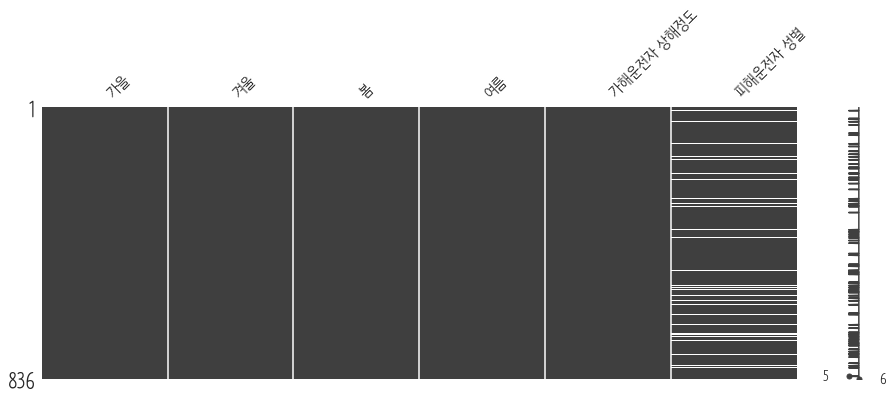

In [181]:
import missingno 
missingno.matrix(crash,figsize=(15,5))

In [185]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(crash,dead,random_state=0)
rfmodel.fit(x_train,y_train)
# rfmodel.predict([[4,0]])


print('변수의 중요도 : {}'.format(rfmodel.feature_importances_))


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [44]:
b['사고타입2'].value_counts()

 측면충돌          374
 기타            116
 추돌             90
 횡단중            89
 전도전복           44
 정면충돌           38
 공작물충돌          36
 도로외이탈          13
 전도전복           10
 보도통행중           9
 차도통행중           9
 길가장자리구역통행중      8
Name: 사고타입2, dtype: int64

In [49]:
b = b.rename({'가해운전자 연령.1':'가해운전자 연령대'},axis='columns')

In [50]:
b['가해운전자 연령대'] = b['가해운전자 연령대'].replace({'30대':3,'50대':5,'40대':4,'60대':6,'70대':7,'10대':1,'80대':8,'20대':2,'90대':9,'미분류':5})

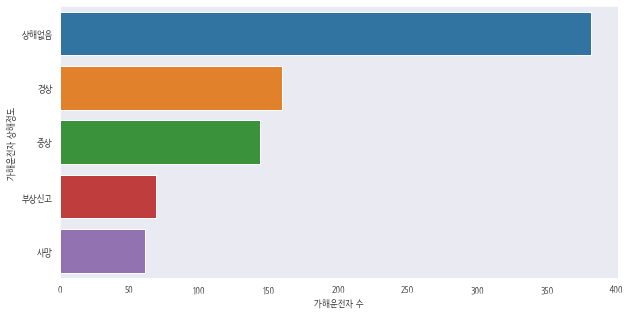

In [52]:
fig,ax = plt.subplots()
fig.set_size_inches(10,5)

sns.countplot(data=b,y='가해운전자 상해정도',order=['상해없음','경상','중상','부상신고','사망'])
plt.xlabel('가해운전자 수')
plt.rc('font',family=font_ob)

In [13]:
b['기상상태'].value_counts()

맑음    768
비      41
흐림     23
기타      3
눈       1
Name: 기상상태, dtype: int64

In [32]:
b['사고타입'].value_counts()

차대차      582
차대사람     135
차량단독     119
Name: 사고타입, dtype: int64

In [33]:
b['법규위반'].value_counts()

안전운전불이행      457
신호위반         116
안전거리미확보       60
중앙선침범         57
교차로운행방법위반     40
직진우회전진행방해     35
보행자보호의무위반     33
기타            25
차로위반           5
과속             5
불법유턴           3
Name: 법규위반, dtype: int64

In [34]:
b['피해운전자 상해정도'].value_counts()

경상      351
상해없음    234
중상      106
미분류      27
부상신고     18
기타불명      6
사망        2
Name: 피해운전자 상해정도, dtype: int64

In [37]:
b['가해운전자 연령대'].value_counts()

1    155
2    153
3    123
5    118
6     94
7     86
4     81
8     24
9      2
Name: 가해운전자 연령대, dtype: int64

In [71]:
b['요일'].value_counts()

토요일    156
일요일    128
수요일    123
금요일    116
목요일    113
화요일    103
월요일     97
Name: 요일, dtype: int64

In [70]:
b['년'].value_counts()

2019년    305
2018년    278
2017년    253
Name: 년, dtype: int64

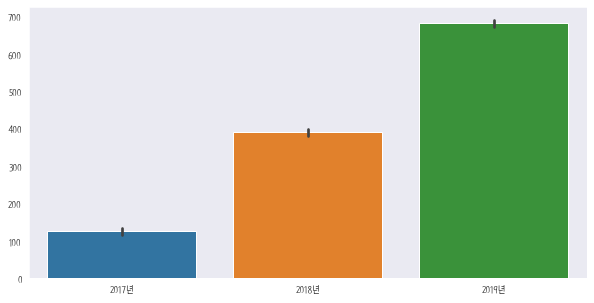

In [76]:
fig,ax = plt.subplots()
fig.set_size_inches(10,5)

sns.barplot(data=b,x=b['년'].values,y=b['년'].index.values)

In [50]:
b['년'].value_counts()

2019년    305
2018년    278
2017년    253
Name: 년, dtype: int64

In [5]:
b['가해운전자 성별'].value_counts()

남       805
여        29
기타불명      2
Name: 가해운전자 성별, dtype: int64

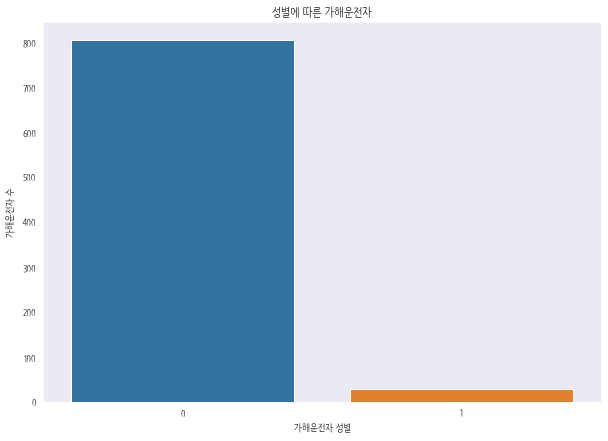

In [18]:
fig,ax = plt.subplots()
fig.set_size_inches(10,7)

sns.countplot(data=b,x='가해운전자 성별')
plt.ylabel('가해운전자 수')
plt.title('성별에 따른 가해운전자')
plt.rc('font',family=font_ob)

In [179]:
LR.coef_[0]

array([-0.16375612,  0.02996751])

In [180]:
LR.intercept_[0]

-0.09743735206370929

In [148]:
test = a.loc[a['사고내용'] == 1]

In [163]:
a['피해운전자_차종'].value_counts()

5    426
4    135
3     63
2     50
1     23
0     14
Name: 피해운전자_차종, dtype: int64

In [171]:
a['가해운전자_연령_1'].value_counts()

20대    136
10대    133
30대    106
50대     97
60대     75
70대     73
40대     66
80대     21
90대      2
미분류      2
Name: 가해운전자_연령_1, dtype: int64

In [162]:
# a['피해운전자_차종'] = a['피해운전자_차종'].replace({'자전거':0,'승합':1,'화물':2,'이륜':3,'보행자':4,'승용':5, '특수':0})

In [172]:
a['가해운전자_연령_1'] = a['가해운전자_연령_1'].replace({'30대':3,'50대':5,'40대':4,'60대':6,'70대':7,'10대':1,'80대':8,'20대':2,'90대':9,'미분류':0})

In [173]:
a.head()

,사고내용,사망자수,중상자수,경상자수,부상신고자수,년,월,계절,일,시간,...,가해운전자_성별,가해운전자_연령,가해운전자_연령_1,가해운전자_연령2,가해운전자_상해정도,피해운전자_차종,피해운전자_성별,피해운전자_연령,연령대,피해운전자_상해정도
0,1,0,1,0,0,2017년,1,겨울,6일,21,...,1,16세,1,01월 19일,중상,5,남,34세,3,상해없음
1,0,0,0,1,0,2017년,1,겨울,18일,18,...,1,23세,2,20-64,상해없음,5,남,65세,6,상해없음
2,0,0,0,1,0,2017년,1,겨울,26일,21,...,1,31세,3,20-64,경상,5,남,28세,2,상해없음
3,1,1,0,0,0,2017년,2,겨울,2일,18,...,1,55세,5,20-64,사망,1,남,52세,5,상해없음
4,0,0,0,1,0,2017년,2,겨울,8일,10,...,1,80세,8,over 65,경상,1,여,52세,5,경상


In [83]:
a.keys()

Index(['사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수', '년', '월', '계절', '일', '시간',
       '시간대', '요일', '주중주말', '구', '시군', '법정동', '사고유형', '사고타입', '사고타입2', '법규위반',
       '노면상태', '기상상태', '도로형태', '가해운전자_차종', '가해운전자_성별', '가해운전자_연령',
       '가해운전자_연령_1', '가해운전자_연령2', '가해운전자_상해정도', '피해운전자_차종', '피해운전자_성별',
       '피해운전자_연령', '연령대', '피해운전자_상해정도'],
      dtype='object')

In [55]:
a['계절'].value_counts()

여름    225
가을    203
봄     195
겨울     93
Name: 계절, dtype: int64

In [175]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(crash,dead,test_size=0.2,random_state=42)

In [176]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(x_train,y_train)

LogisticRegression()

In [177]:
LR.predict([[1,0]])

array([0], dtype=int64)

In [178]:
LR.score(x_train,y_train)

0.6566901408450704

In [181]:
LR.coef_[0]

array([-0.16375612,  0.02996751])

In [182]:
LR.intercept_[0]

-0.09743735206370929

In [113]:
print('남성은 0 여성은 1로 표기하였다')

남성은 0 여성은 1로 표기하였다


In [114]:
a['사고내용'].value_counts()

경상사고      443
중상사고      264
부상신고사고     66
사망사고       63
Name: 사고내용, dtype: int64

In [115]:
a['년'].value_counts()

2019년    305
2018년    278
2017년    253
Name: 년, dtype: int64

In [116]:
a['계절'].value_counts()

여름    266
가을    240
봄     228
겨울    102
Name: 계절, dtype: int64